# SQL und statistische Analyse

In [1]:
import pandas as pd
import sqlite3

sql = sqlite3.connect("../newsticker.db")

In [2]:
docs = pd.read_sql("SELECT * FROM news", sql)

In [3]:
docs["time"].max()

'2023-12-31 18:30:00.000000'

In [4]:
docs = docs[(docs["time"]>='2022-01-01')]
docs

,id,headline,author,time,lead,text,comments,security,url
1,2023,,,2023-05-30 14:08:12.000000,,,NaN,None,https://t3n.de/news/eu-regelungen-gender-pay-g...
227624,6175683,Geelys Geespace startet erste Satelliten für s...,Daniel AJ Sokolov,2022-06-03 05:04:00.000000,240 LEO-Satelliten sollen autonomen Geely-Auto...,Geespace hat den Aufbau eines erdnahen Satelli...,10.0,None,/news/Geelys-Geespace-startet-erste-Satelliten...
229555,6233916,Zentrum für KI in der Medizin ​soll für modern...,Marie-Claire Koch,2023-11-16 09:20:00.000000,In Niedersachsen soll ein neues Forschungszent...,In Niedersachsen entsteht ein Forschungszentru...,1.0,None,/news/Zentrum-fuer-KI-in-der-Medizin-soll-fuer...
230160,6266836,Bericht: Höchststand bei Anschlägen auf Geldau...,dpa,2022-12-03 17:17:00.000000,Kriminelle verüben immer mehr Anschläge auf Ge...,Rund 450 Geldautomaten in Deutschland sind ein...,132.0,None,/news/Bericht-Hoechststand-bei-Anschlaegen-auf...
230590,6278959,Grenzenlose Überwachung oder notwendiger Kinde...,Keywan Tonekaboni,2022-01-08 06:30:00.000000,Content-Scanner suchen Social-Media-Plattforme...,"Facebook, Google oder Microsoft nutzen Content...",49.0,None,/news/Grenzenlose-Ueberwachung-oder-notwendige...
...,...,...,...,...,...,...,...,...,...
256422,9584404,Stalking mit Bluetooth-Trackern: Landesministe...,dpa,2023-12-31 14:10:00.000000,Mit winzigen Bluetooth-Ortungsgeräten können S...,Mit scheibenförmigen Ortungsgeräten so klein w...,27.0,None,/news/Stalking-mit-Bluetooth-Trackern-Landesmi...
256423,9584447,EU-Vorschlag: Selbstverpflichtung statt Cookie...,Benjamin Kraft,2023-12-31 15:35:00.000000,"Cookie-Banner sind gut für den Datenschutz, ab...",Datenschutz im Internet ist nervig: Beim erste...,100.0,None,/news/EU-Vorschlag-Selbstverpflichtung-statt-C...
256424,9584467,Neue Lücke in altem E-Mail-Protokoll: SMTP smu...,Peter Siering,2023-12-31 16:14:00.000000,Sicherheitsforscher haben eine Schwäche im Sim...,"Wenn heute E-Mails durchs Internet flutschen, ...",181.0,None,/news/Neue-Luecke-in-altem-E-Mail-Protokoll-SM...
256425,9584487,"Elektronische Krankschreibungen: 6,8 Millionen...",Marie-Claire Koch,2023-12-31 16:43:00.000000,Mit mehr als 80 Millionen abgerufenen Exemplar...,Monatlich wurden im Jahr 2023 durchschnittlich...,23.0,None,/news/Elektronische-Krankschreibungen-6-8-Mill...


In [5]:
docs.to_csv("newsticker2022-2023.csv.gz")

<AxesSubplot:xlabel='quality'>

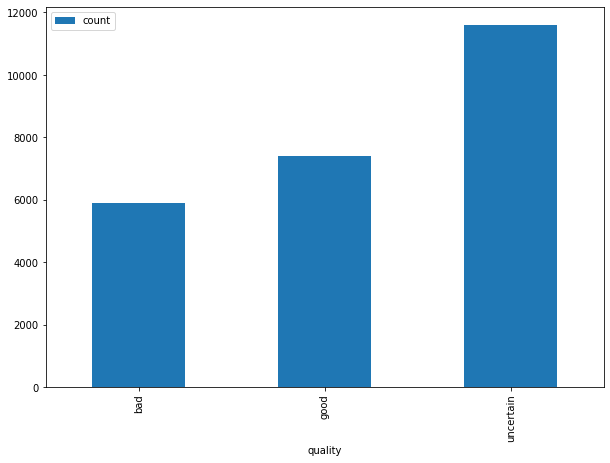

In [9]:
docs["quality"] = "uncertain"
docs.loc[docs["comments"] < 10, "quality"] = "bad"
docs.loc[docs["comments"] > 50, "quality"] = "good"
docs.groupby("quality").agg({ "text": "count"}).rename(columns={"text": "count"}).plot.bar(figsize=(10, 7))

In [10]:
len(docs)

24916

In [11]:
docs

,id,headline,author,time,lead,text,comments,security,url,quality
1,2023,,,2023-05-30 14:08:12.000000,,,NaN,None,https://t3n.de/news/eu-regelungen-gender-pay-g...,uncertain
227624,6175683,Geelys Geespace startet erste Satelliten für s...,Daniel AJ Sokolov,2022-06-03 05:04:00.000000,240 LEO-Satelliten sollen autonomen Geely-Auto...,Geespace hat den Aufbau eines erdnahen Satelli...,10.0,None,/news/Geelys-Geespace-startet-erste-Satelliten...,uncertain
229555,6233916,Zentrum für KI in der Medizin ​soll für modern...,Marie-Claire Koch,2023-11-16 09:20:00.000000,In Niedersachsen soll ein neues Forschungszent...,In Niedersachsen entsteht ein Forschungszentru...,1.0,None,/news/Zentrum-fuer-KI-in-der-Medizin-soll-fuer...,bad
230160,6266836,Bericht: Höchststand bei Anschlägen auf Geldau...,dpa,2022-12-03 17:17:00.000000,Kriminelle verüben immer mehr Anschläge auf Ge...,Rund 450 Geldautomaten in Deutschland sind ein...,132.0,None,/news/Bericht-Hoechststand-bei-Anschlaegen-auf...,good
230590,6278959,Grenzenlose Überwachung oder notwendiger Kinde...,Keywan Tonekaboni,2022-01-08 06:30:00.000000,Content-Scanner suchen Social-Media-Plattforme...,"Facebook, Google oder Microsoft nutzen Content...",49.0,None,/news/Grenzenlose-Ueberwachung-oder-notwendige...,uncertain
...,...,...,...,...,...,...,...,...,...,...
256422,9584404,Stalking mit Bluetooth-Trackern: Landesministe...,dpa,2023-12-31 14:10:00.000000,Mit winzigen Bluetooth-Ortungsgeräten können S...,Mit scheibenförmigen Ortungsgeräten so klein w...,27.0,None,/news/Stalking-mit-Bluetooth-Trackern-Landesmi...,uncertain
256423,9584447,EU-Vorschlag: Selbstverpflichtung statt Cookie...,Benjamin Kraft,2023-12-31 15:35:00.000000,"Cookie-Banner sind gut für den Datenschutz, ab...",Datenschutz im Internet ist nervig: Beim erste...,100.0,None,/news/EU-Vorschlag-Selbstverpflichtung-statt-C...,good
256424,9584467,Neue Lücke in altem E-Mail-Protokoll: SMTP smu...,Peter Siering,2023-12-31 16:14:00.000000,Sicherheitsforscher haben eine Schwäche im Sim...,"Wenn heute E-Mails durchs Internet flutschen, ...",181.0,None,/news/Neue-Luecke-in-altem-E-Mail-Protokoll-SM...,good
256425,9584487,"Elektronische Krankschreibungen: 6,8 Millionen...",Marie-Claire Koch,2023-12-31 16:43:00.000000,Mit mehr als 80 Millionen abgerufenen Exemplar...,Monatlich wurden im Jahr 2023 durchschnittlich...,23.0,None,/news/Elektronische-Krankschreibungen-6-8-Mill...,uncertain


In [12]:
docs[docs["quality"]!="uncertain"].set_index("id")[["headline", "comments", "time", "quality"]].to_csv("newsticker-2022-2023-good-bad.csv.gz")